In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-colorblind')

C:\Users\davisoc\AppData\Local\Temp\ipykernel_19548\3031116794.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-colorblind')


In [3]:
df1 = pd.read_pickle("./time_data/time_data_1.pkl") 
df2 = pd.read_pickle("./time_data/time_data_2.pkl")
df3 = pd.read_pickle("./time_data/time_data_3.pkl")
df4 = pd.read_pickle("./time_data/time_data_4.pkl")
df = pd.concat([df1,df2,df3,df4],ignore_index=True)

In [4]:
c = []
rows = df.shape[0]
for i in range(0,rows):
    if df["Our Time"][i] > df["ETE Time"][i]:
        # Our time is slower
        c.append("DarkBlue")
    else:
        # Our time is faster
        c.append("DarkGreen")

df["Color"] = c

In [28]:
df["Color"].value_counts()

DarkGreen    1151
DarkBlue      749
Name: Color, dtype: int64

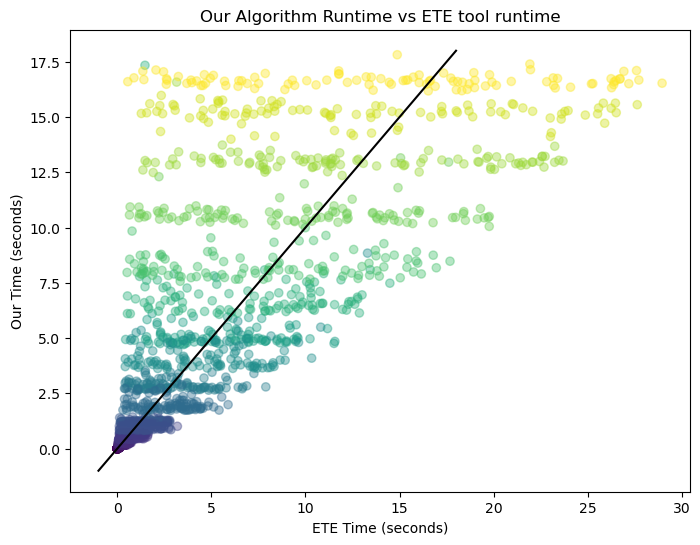

In [27]:
plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.scatter(df["ETE Time"],df["Our Time"],c=df["OTUs"],alpha=0.4)
ax.plot([-1, 18], [-1, 18],c="Black")


ax.set_xlabel('ETE Time (seconds)')
ax.set_ylabel('Our Time (seconds)')
ax.set_title('Our Algorithm Runtime vs ETE tool runtime')

plt.show()

<Axes: title={'center': 'ETE Time'}, xlabel='OTUs'>

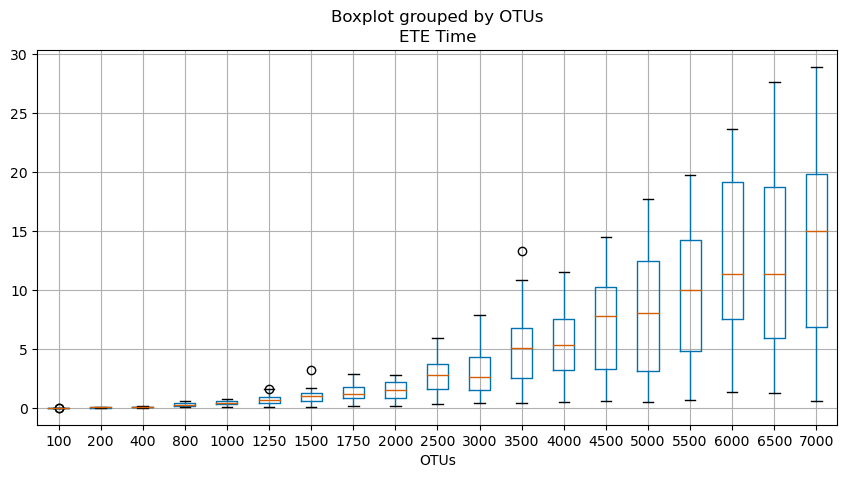

In [30]:
df.boxplot(column=['ETE Time'], by='OTUs',figsize=(10,5))

<Axes: xlabel='OTUs', ylabel='ETE Time'>

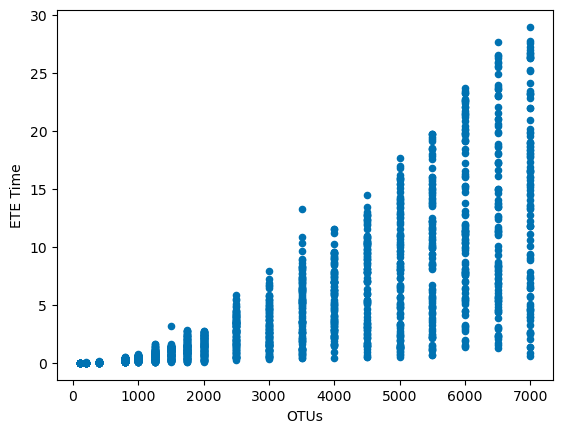

In [35]:
df.plot.scatter(x="OTUs",y="ETE Time")

In [8]:
met_df = pd.read_pickle("./time_data/metric_data_otu1000_para_4.pkl")
met_df.head()

,ETE Time,Height,Diameter,CTI,SI,B1
0,0.327585,25,44,0.013390,13.661,537.962964
1,0.154607,22,39,0.011184,12.845,535.677488
2,0.235250,22,40,0.011759,13.022,534.795467
3,0.451651,26,44,0.012203,12.867,535.163300
4,0.155116,23,39,0.013260,13.708,536.458105


,ETE Time,Height,Diameter,CTI,SI,B1
ETE Time,1.000000,-0.241300,0.155510,-0.540198,-0.520738,-0.065785
Height,-0.241300,1.000000,0.720815,0.639482,0.626388,-0.095241
Diameter,0.155510,0.720815,1.000000,0.327702,0.336125,-0.169110
CTI,-0.540198,0.639482,0.327702,1.000000,0.977523,-0.034567
SI,-0.520738,0.626388,0.336125,0.977523,1.000000,-0.027545
B1,-0.065785,-0.095241,-0.169110,-0.034567,-0.027545,1.000000


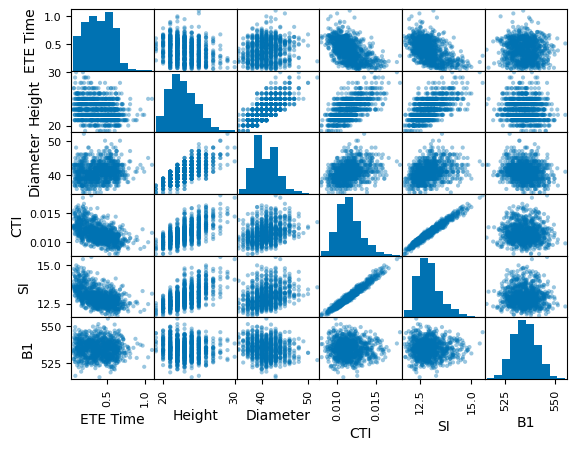

In [29]:
pd.plotting.scatter_matrix(met_df,alpha=0.4)
met_df.corr()

<Axes: xlabel='ETE Time', ylabel='CTI'>

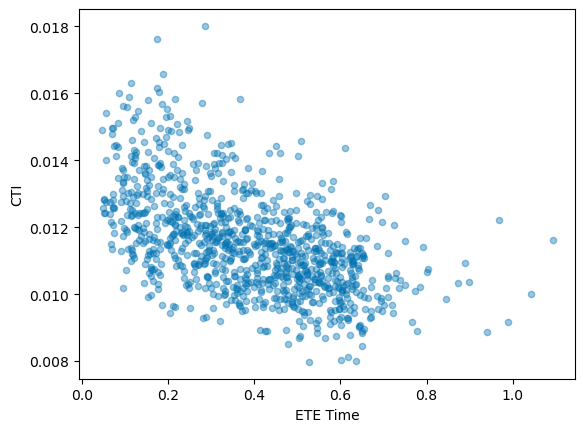

In [10]:
met_df.plot.scatter(x="ETE Time",y="CTI",alpha=.4)

In [11]:
met_df.corr()

,ETE Time,Height,Diameter,CTI,SI,B1
ETE Time,1.000000,-0.241300,0.155510,-0.540198,-0.520738,-0.065785
Height,-0.241300,1.000000,0.720815,0.639482,0.626388,-0.095241
Diameter,0.155510,0.720815,1.000000,0.327702,0.336125,-0.169110
CTI,-0.540198,0.639482,0.327702,1.000000,0.977523,-0.034567
SI,-0.520738,0.626388,0.336125,0.977523,1.000000,-0.027545
B1,-0.065785,-0.095241,-0.169110,-0.034567,-0.027545,1.000000


In [17]:
cc_df = pd.read_pickle("./time_data/compact_compare_2.pkl")

In [18]:
c = []
rows = cc_df.shape[0]
for i in range(0,rows):
    if cc_df["Our Time"][i] > cc_df["ETE Time"][i]:
        # Our time is slower
        c.append("DarkBlue")
    else:
        # Our time is faster
        c.append("DarkGreen")

cc_df["Color"] = c

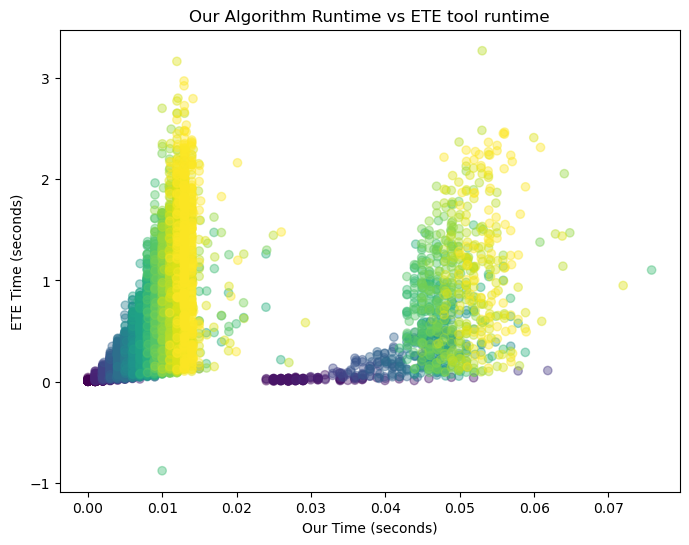

In [26]:
plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.scatter(cc_df["Our Time"],cc_df["ETE Time"],c=cc_df["OTUs"],alpha=0.4)

ax.set_xlabel('Our Time (seconds)')
ax.set_ylabel('ETE Time (seconds)')
ax.set_title('Our Algorithm Runtime vs ETE tool runtime')

plt.show()

<Axes: title={'center': 'Our Time'}, xlabel='OTUs'>

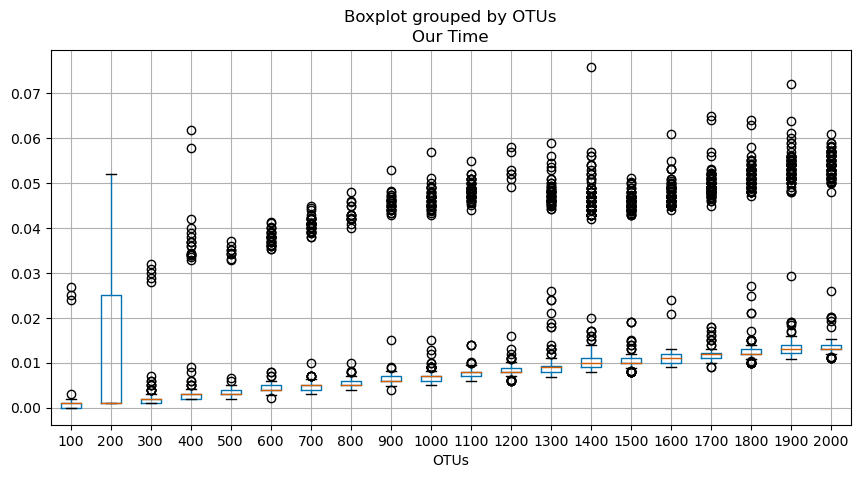

In [23]:
cc_df.boxplot(column=['Our Time'], by='OTUs',figsize=(10,5))

array([<Axes: title={'center': 'Our Time'}, xlabel='OTUs'>,
       <Axes: title={'center': 'ETE Time'}, xlabel='OTUs'>], dtype=object)

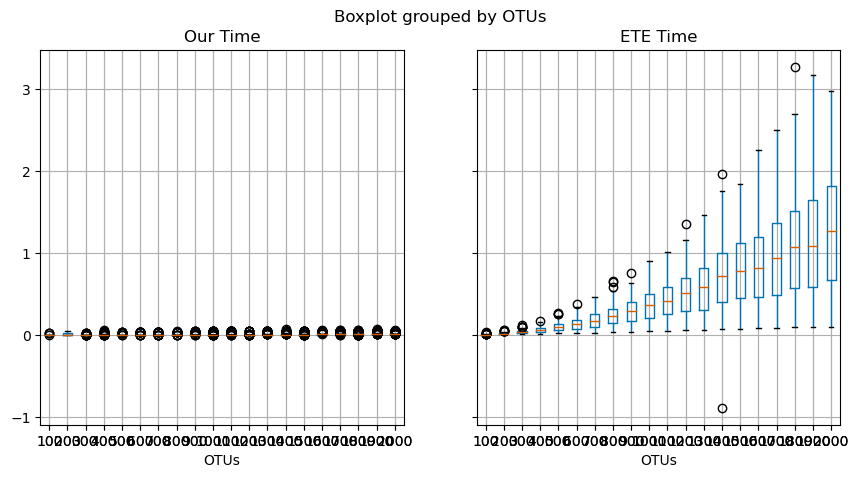

In [25]:
cc_df.boxplot(column=['Our Time','ETE Time'], by='OTUs',figsize=(10,5))